In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import get_dataremodelled as gdr
import graphcreating as gc
import networkx as nx

In [4]:
gender=pd.read_csv('Data/gendered_titles_final.csv')
gender=gender.drop_duplicates(subset='Name')
revisions=pd.read_csv('Data/revisions_en.csv')
revisions=gdr.prep_data(revisions,gender)
revisions=gdr.prep_links(revisions,gender)


c:\Users\karen\OneDrive\Skrivebord\Operators-with-pocket-calculators\Final kode\Git\get_dataremodelled.py:12: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df=df[~df['Name'].str.contains(errorlistcontains[i])]
c:\Users\karen\OneDrive\Skrivebord\Operators-with-pocket-calculators\Final kode\Git\get_dataremodelled.py:84: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df = df[~df['Link'].str.contains(errorlistcontains[i])]


In [5]:
revisions=revisions[revisions['Year']==2024]

In [4]:
G=gc.create_directed_graph(revisions,gender)


Top 10 nodes by in-degree

In [ ]:
indeg = dict(G.in_degree())
sorted_indeg = sorted(indeg.items(), key=lambda x: x[1], reverse=True)
top_indeg = sorted_indeg[:10]
print(top_indeg)

[('Albert Einstein', 270), ('Charles Darwin', 237), ('Aristotle', 189), ('Isaac Newton', 158), ('John von Neumann', 136), ('Euclid', 133), ('David Hilbert', 133), ('Paul Erdős', 120), ('Niels Bohr', 111), ('Felix Klein', 109)]


In [ ]:
list_of_women=gender[gender['gender']=='f']['Name'].tolist()

In [ ]:
in_degree_women=[]
out_degree_women=[]
in_degree_men=[]
out_degree_men=[]
for node in G.nodes:
    if node in list_of_women:
        in_degree_women.append(G.in_degree(node))
        out_degree_women.append(G.out_degree(node))
        if G.in_degree(node)>200:
            print(node)
    else:
        in_degree_men.append(G.in_degree(node))
        out_degree_men.append(G.out_degree(node))

        
        
hist_in_women, bins_in_women = np.histogram(in_degree_women, bins=30)
hist_out_women, bins_out_women = np.histogram(out_degree_women, bins=30)
hist_in_men, bins_in_men = np.histogram(in_degree_men, bins=30)
hist_out_men, bins_out_men = np.histogram(out_degree_men, bins=30)

In [ ]:
print("Average in degree women:",np.mean(in_degree_women))
print("Average in degree men:",np.mean(in_degree_men))
print("Average out degree women:",np.mean(out_degree_women))
print("Average out degree men:",np.mean(out_degree_men))



Average in degree women: 1.2978362324989394
Average in degree men: 3.201530038250956
Average out degree women: 1.9707254985150615
Average out degree men: 3.082577064426611


Text(0.5, 1.0, 'Out-degree Distribution men')

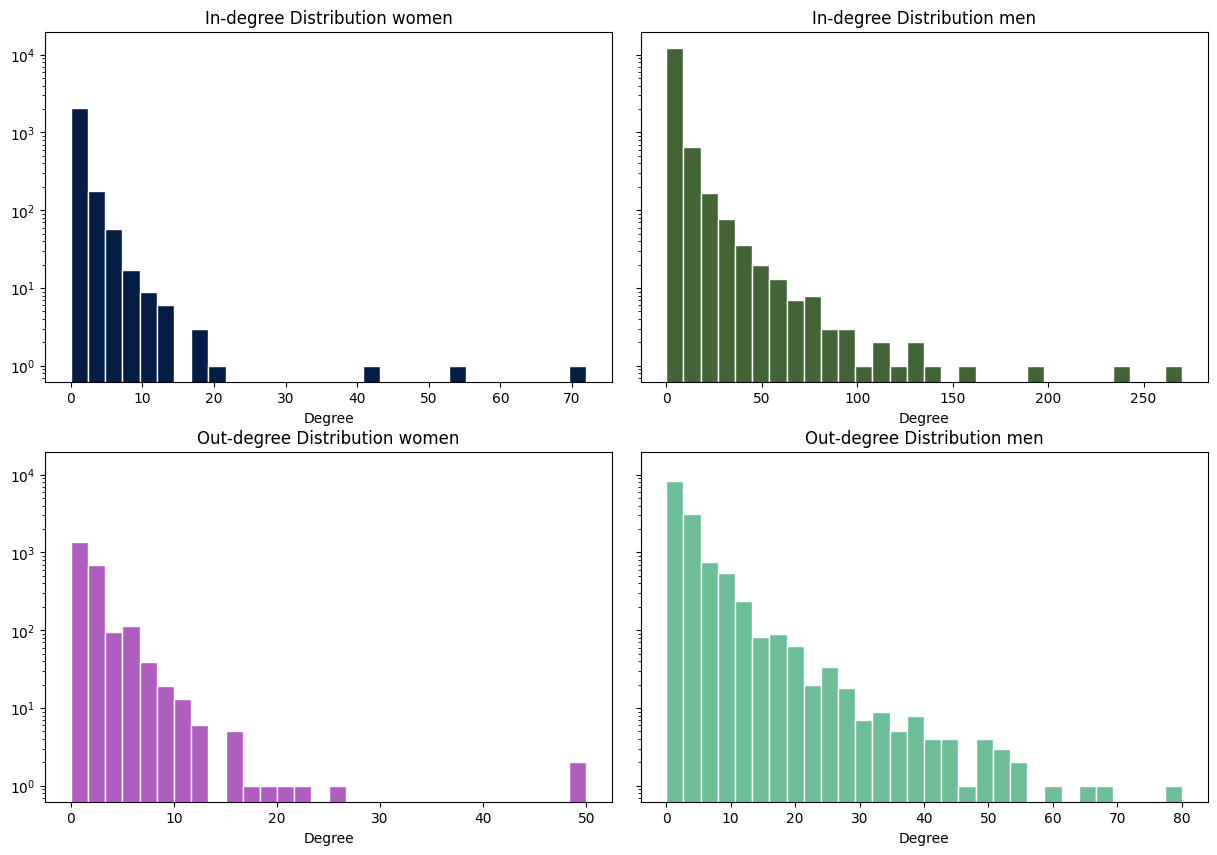

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10), sharey=True)

plt.subplots_adjust(hspace=0.2)
plt.subplots_adjust(wspace=0.05)


ax[0,0].bar(bins_in_women[:-1], hist_in_women, width=np.diff(bins_in_women), color="#031D44", align="edge", edgecolor="white")
ax[0,0].set_yscale("log")
ax[0,0].set_xlabel("Degree")
ax[0,0].set_title("In-degree Distribution women")

ax[0,1].bar(bins_in_men[:-1], hist_in_men, width=np.diff(bins_in_men), color="#436436", align="edge", edgecolor="white")
ax[0,1].set_yscale("log")
ax[0,1].set_xlabel("Degree")
ax[0,1].set_title("In-degree Distribution men")

ax[1,0].bar(bins_out_women[:-1], hist_out_women, width=np.diff(bins_out_women), color="#AF5EC0", align="edge", edgecolor="white")
ax[1,0].set_yscale("log")
ax[1,0].set_xlabel("Degree")
ax[1,0].set_title("Out-degree Distribution women")

ax[1,1].bar(bins_out_men[:-1], hist_out_men, width=np.diff(bins_out_men), color="#6DBE98", align="edge", edgecolor="white")
ax[1,1].set_yscale("log")
ax[1,1].set_xlabel("Degree")
ax[1,1].set_title("Out-degree Distribution men")



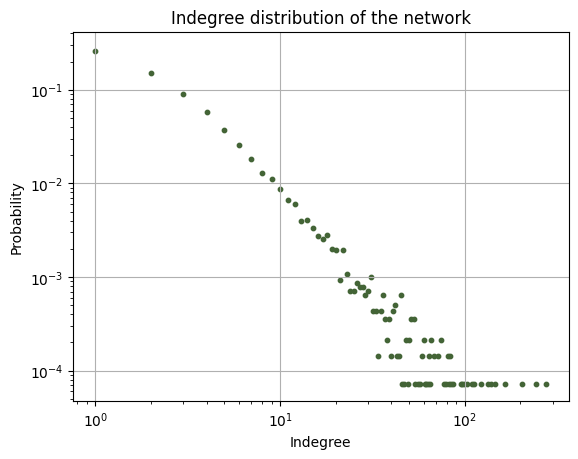

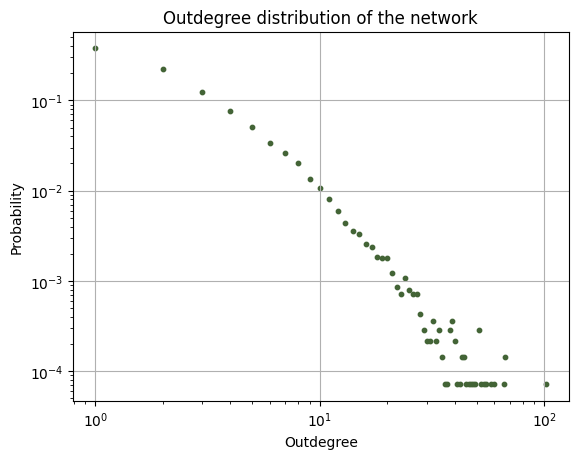

In [6]:
names=revisions['Name'].unique().tolist()
namelist=[]
outdegrees=[]
indegrees=[]
degrees=[]

for name in names:
    outdegree=len(revisions[revisions['Name']==name])
    indegree=len(revisions[revisions['Link']==name])
    degree=indegree+outdegree
    namelist.append(name)
    outdegrees.append(outdegree)
    indegrees.append(indegree)
    degrees.append(degree)

degreedf=pd.DataFrame({'Name':namelist,'Outdegree':outdegrees,'Indegree':indegrees,'Degree':degrees})
degreeuniqueout=degreedf['Outdegree'].unique().tolist()
degreeuniquein=degreedf['Indegree'].unique().tolist()

degreeuniqueout.sort()
degreeuniquein.sort()

distributionin=[]
for degree in degreeuniquein:
    p=len(degreedf[degreedf['Indegree']==degree])/len(degreedf)
    distributionin.append(p)

distributionout=[]
for degree in degreeuniqueout:
    p=len(degreedf[degreedf['Outdegree']==degree])/len(degreedf)
    distributionout.append(p)

plt.scatter(degreeuniquein, distributionin,marker='o',color='#436436',s=10)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Indegree')
plt.ylabel('Probability')
plt.title('Indegree distribution of the network')
plt.grid()
plt.show()

plt.scatter(degreeuniqueout, distributionout,marker='o',color='#436436',s=10)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Outdegree')
plt.ylabel('Probability')
plt.title('Outdegree distribution of the network')
plt.grid()
plt.show()
